In [2]:
import sinter
import tsim
import stim
import numpy as np
import matplotlib.pyplot as plt

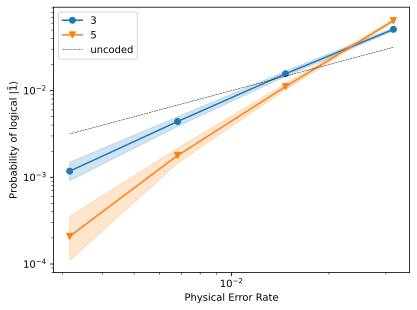

In [3]:
noise_vals = np.logspace(-2.5, -1.5, 4)
tasks = [
    sinter.Task(
        circuit=tsim.Circuit.from_stim_program(
            stim.Circuit.generated(
                "surface_code:rotated_memory_z",
                distance=distance,
                rounds=3,
                after_clifford_depolarization=noise,
            )
        ).cast_to_stim(),
        json_metadata={"p": noise, "distance": distance, "rounds": 3},
    )
    for noise in noise_vals
    for distance in [3, 5]
]

collected_stats = sinter.collect(
    num_workers=8,
    tasks=tasks,
    decoders=["pymatching"],
    max_shots=1024 * 64,
    max_errors=1024 * 32,
    start_batch_size=1024 * 32,
    max_batch_size=1024 * 32,
)

fig, ax = plt.subplots(1, 1)
sinter.plot_error_rate(
    ax=ax,
    stats=collected_stats,
    x_func=lambda stats: stats.json_metadata["p"],
    group_func=lambda stats: stats.json_metadata["distance"],
    failure_units_per_shot_func=lambda stats: stats.json_metadata["rounds"],
)
plt.plot(noise_vals, noise_vals, color="k", linestyle="--", lw=0.5, label="uncoded")
ax.loglog()
ax.set_xlabel("Physical Error Rate")
ax.set_ylabel(f"Probability of logical $|\\bar{1}\\rangle$")
ax.legend();